<a href="https://colab.research.google.com/github/SScliff/Projeto_DataScience_alura/blob/main/AluraStoreBr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importação dos dados



In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick



url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja1 = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

lojas = {
    "Loja 1": loja1,
    "Loja 2": loja2,
    "Loja 3": loja3,
    "Loja 4": loja4,
}
loja1.head()



,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


#1. Análise do faturamento


In [48]:
faturamento_lojas = {nome: df["Preço"].sum() for nome, df in lojas.items()}

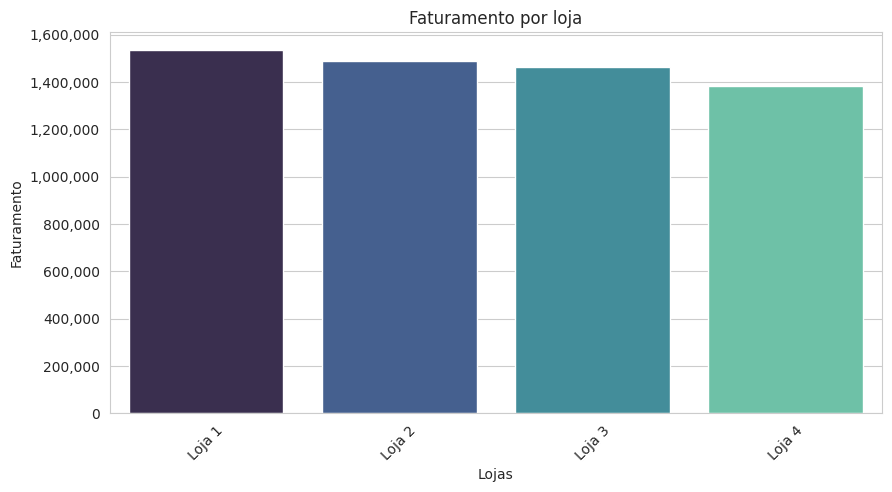

In [115]:
df_faturamento = pd.DataFrame.from_dict(faturamento_lojas, orient='index', columns=["Faturamento"])
df_faturamento.index.name = "Loja"
df_faturamento.reset_index(inplace=True)

plt.figure(figsize=(9, 5))
sns.set_style('whitegrid')

ax = sns.barplot(y='Faturamento',x='Loja',hue='Loja', data=df_faturamento, palette='mako')
ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))
plt.title('Faturamento por loja')
plt.xlabel('Lojas')
plt.ylabel('Faturamento')
plt.xticks(rotation = 45)
plt.tight_layout(pad=1.0)


# 2. Vendas por Categoria


In [105]:
venda_por_categoria = {
    nome_loja: df_loja.groupby('Categoria do Produto')['Preço'].sum().to_dict()
    for nome_loja, df_loja in lojas.items()
}
print(venda_por_categoria)

{'Loja 1': {'brinquedos': 23993.78, 'eletrodomesticos': 484913.36, 'eletronicos': 572659.23, 'esporte e lazer': 52387.55, 'instrumentos musicais': 121731.69, 'livros': 11713.92, 'moveis': 250178.11000000002, 'utilidades domesticas': 16931.48}, 'Loja 2': {'brinquedos': 21262.21, 'eletrodomesticos': 464758.13, 'eletronicos': 547773.71, 'esporte e lazer': 46326.09, 'instrumentos musicais': 139987.03, 'livros': 13454.35, 'moveis': 235234.68, 'utilidades domesticas': 19662.86}, 'Loja 3': {'brinquedos': 25869.2, 'eletrodomesticos': 438984.89, 'eletronicos': 547699.92, 'esporte e lazer': 47456.1, 'instrumentos musicais': 103174.45, 'livros': 12664.7, 'moveis': 268095.56, 'utilidades domesticas': 20080.21}, 'Loja 4': {'brinquedos': 27015.67, 'eletrodomesticos': 377680.65, 'eletronicos': 545966.86, 'esporte e lazer': 44465.65, 'instrumentos musicais': 100136.5, 'livros': 12427.77, 'moveis': 256705.65, 'utilidades domesticas': 20098.83}}


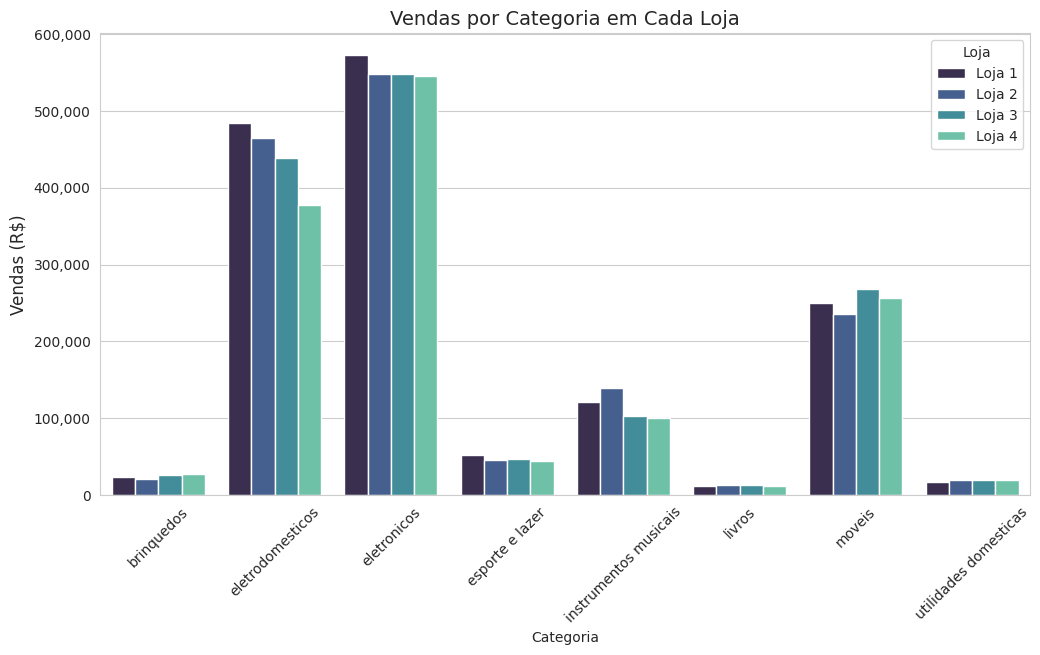

In [111]:
df_vendas = pd.DataFrame.from_dict(venda_por_categoria, orient='index')
df_vendas = df_vendas.reset_index().melt(id_vars='index', var_name='Categoria', value_name='Vendas')
df_vendas = df_vendas.rename(columns={'index': 'Loja'})
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=df_vendas, x='Categoria', y='Vendas',hue = 'Loja', palette='mako')
ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))
plt.title('Vendas por Categoria em Cada Loja', fontsize=14)
plt.ylabel('Vendas (R$)', fontsize=12)
plt.xticks(rotation=45)
plt.show()

# 3. Média de Avaliação das Lojas

In [ ]:
media_avaliacoes = {nome_loja: df_loja["Avaliação da compra"].mean().round(2)
 for nome_loja, df_loja in lojas.items()}
print(media_avaliacoes)

{'Loja 1': np.float64(3.98), 'Loja 2': np.float64(4.04), 'Loja 3': np.float64(4.05), 'Loja 4': np.float64(4.0)}


<Axes: xlabel='Loja', ylabel='media'>

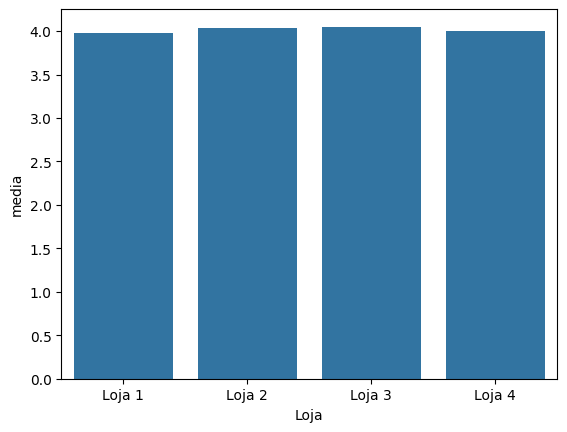

In [ ]:
df_media = pd.DataFrame.from_dict(media_avaliacoes, orient='index', columns=['media'])
df_media = df_media.reset_index().rename(columns={'index': 'Loja'})
sns.barplot(data=df_media, x='Loja', y='media')

# 4. Produtos Mais e Menos Vendidos

In [ ]:
produtos_vendidos = {nome_loja: df['Produto'].value_counts() for nome_loja, df in lojas.items()}
item_mais_vendido = {
    nome_loja: (contagem_produto.index[0], contagem_produto.iloc[0])
    for nome_loja, contagem_produto in produtos_vendidos.items()
}
item_menos_vendido = {
    nome_loja: (contagem_produto.index[-1], contagem_produto.iloc[-1])
    for nome_loja, contagem_produto in produtos_vendidos.items()
}

In [ ]:
df_mais_vendidos = pd.DataFrame.from_dict(item_mais_vendido, orient='index', columns=['Produto', 'Quantidade'])
df_mais_vendidos = df_mais_vendidos.reset_index().rename(columns={'index': 'Loja'})

df_menos_vendidos = pd.DataFrame.from_dict(item_menos_vendido, orient='index', columns=['Produto', 'Quantidade'])
df_menos_vendidos = df_menos_vendidos.reset_index().rename(columns={'index': 'Loja'})




# 5. Frete Médio por Loja


In [ ]:
frete_medio = {
    nome_loja:df_loja['Frete'].mean().round(2) for nome_loja, df_loja in lojas.items()}
print(frete_medio)

{'Loja 1': np.float64(34.69), 'Loja 2': np.float64(33.62), 'Loja 3': np.float64(33.07), 'Loja 4': np.float64(31.28)}
